Nearest subclasscentroid classifier (NCS)

Perform on centroid on the subclasses 2,3,5 = perform on class, with numbers 2,3,5
By clustering

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_openml
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
from sklearn import cluster, datasets, mixture
import scipy.io as scip
start = time()
X, y = fetch_openml('mnist_784', version=1 ,return_X_y=True)
t = time()-start

print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)
 

Overall # of samples is 70000
Size of the features is: (70000, 784)


In [ ]:
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

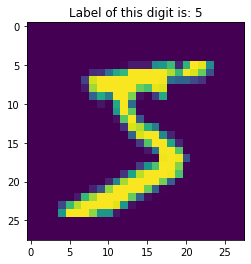

In [2]:
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(28, 28)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
    plt.show()

show_digit(X[0], y[0])

In [3]:
n_train = 60000
n_test = 10000
# split_loc = 60000 # train and test split at location of 60k

# Splitting training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0) 

In [4]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [5]:
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

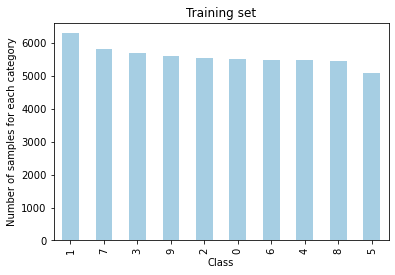

In [6]:
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

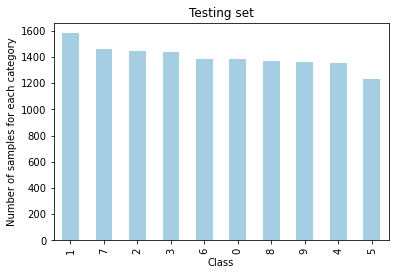

In [7]:
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

In [8]:
# calculate euclidean distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [9]:
# classes
classes = np.array([2,3,5])

#score list
accuracies=[]


In [16]:
for k in range(2,3,5):
    # train model for classes
    model = NearestCentroid(n_classes=k) 
    model.fit(X_train, y_train.ravel()) 
    
    #evaluate the model and update the acc list
    score = model.score(x_train, y_train)
    print("class=%d, acc=%2.f%%" % (k, score*100))
    accuracies.append(score)
    

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("classes=%d achieved highest accuracy of %.2f%% on validation data" % (classes[i],
	accuracies[i] * 100))

TypeError: __init__() got an unexpected keyword argument 'n_classes'

In [ ]:
# Printing Accuracy on Training and Test sets 
print(f"Training Set Score : {model.score(X_train, y_train) * 100} %") 
print(f"Test Set Score : {model.score(X_test, y_test) * 100} %") 
  
# Printing classification report of classifier on the test set set data 
print(f"Model Classification Report : \n{classification_report(y_test, model.predict(X_test))}") 